# Objectives
1. Dates and calendars
  - 1.1 Creating data objects
  - 1.2 Math with dates
  - 1.3 Turning dates into strings
2. Combining dates and times
  - 2.1 Dates and times
  - 2.2 Printing and parsing datetimes
  - 2.3 Working with durations
3. Time Zones and daylight saving
  - 3.1 UTC offsets (UK standard)
  - 3.2 Time zone database
  - 3.3 Starting daylight saving time
  - 3.4 Ending daylight saving time
4. Dates and times in Pandas
  - 4.1 Reading date and time data in Pandas
  - 4.2 Summarizing datetime 
  - 4.3 Additional datetime methods in Pandas
5. Case study

## 1. Dates and calendars

### 1.1 Creating data objects

In [12]:
# import date 
from datetime import date
# create dates
two_hurricanes_dates = [date(2016,10,7), date(2017,6,21)]

In [4]:
two_hurricanes_dates[0].year

2016

In [6]:
two_hurricanes_dates[1].month

6

In [7]:
two_hurricanes_dates[0].day

7

In [9]:
two_hurricanes_dates[0].weekday()

4

 *Mon,Tues,Wed,Thur,Fri,Sat,Sun: 0,1,2,3,4,5,6*

In [18]:
florida_hurricane_dates = [date(1950, 8, 31),
 date(1950, 9, 5),
 date(1950, 10, 18),
 date(1950, 10, 21),
 date(1951, 5, 18),
 date(1953, 6, 6),
 date(1953, 8, 29), 
 date(1957, 6, 8),
 date(1957, 9, 8),
 date(1958, 9, 4),
 date(1959, 5, 18)]

In [19]:
# Counter for how many before June 1
early_hurricanes = 0

# We loop over the dates
for hurricane in florida_hurricane_dates:
  # Check if the month is before June (month number 6)
  if hurricane.month < 6:
    early_hurricanes = early_hurricanes + 1
    
print(early_hurricanes)

2


### 1.2 Math with dates

In [20]:
# create our dates
d1 = date(2017,11,5)
d2 = date(2017,12,4)
l = [d1,d2]
min(l)

datetime.date(2017, 11, 5)

In [23]:
# substract two dates 
delta = d2 - d1
delta.days # use.days attribute

29

In [25]:
from datetime import timedelta
# create a 29 day timedelta 
td = timedelta(days=29)
print(d1+td)

2017-12-04


In [26]:
# A dictionary to count hurricanes per calendar month
hurricanes_each_month = {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6:0,
		  				 7: 0, 8:0, 9:0, 10:0, 11:0, 12:0}

# Loop over all hurricanes
for hurricane in florida_hurricane_dates:
  # Pull out the month
  month = hurricane.month
  # Increment the count in your dictionary by one
  hurricanes_each_month[month] += 1
  
print(hurricanes_each_month)

{1: 0, 2: 0, 3: 0, 4: 0, 5: 2, 6: 2, 7: 0, 8: 2, 9: 3, 10: 2, 11: 0, 12: 0}


In [27]:
# Sorted() works on ISO 8601 format 
sorted_dates = sorted(florida_hurricane_dates)
print(sorted_dates[0])
print(sorted_dates[-1])

1950-08-31
1959-05-18


### 1.3 Turning dates into strings

In [29]:
d = date(2017,11,5)
# ISO format: YYYY-MM_DD
print(d)

2017-11-05


In [30]:
print([d.isoformat()])

['2017-11-05']


In [31]:
# to use other formats
print(d.strftime('%Y'))

2017


In [32]:
print(d.strftime('Year is %Y'))

Year is 2017


In [39]:
print(d.strftime('%Y/%m/%d'))

2017/11/05


In [40]:
print(d.strftime('%B (%Y)'))

November (2017)


In [41]:
print(d.strftime('%Y-%j')) #%J means days

2017-309


## 2. Combining dates and times

### 2.1 Dates and times

In [43]:
from datetime import datetime
dt = datetime(2017,10,1,15,23,25,500000) # 24 hours
print(dt)

2017-10-01 15:23:25.500000


In [44]:
dt_hr = dt.replace(year= 2020, minute=0, second=0, microsecond=0)
print(dt_hr)

2020-10-01 15:00:00


In [46]:
onebike_datetimes = [{'start': datetime(2017, 10, 1, 15, 23, 25),
  'end': datetime(2017, 10, 1, 15, 26, 26)},
 {'start':datetime(2017, 10, 1, 15, 42, 57),
  'end': datetime(2017, 10, 1, 17, 49, 59)},
 {'start': datetime(2017, 10, 2, 6, 37, 10),
  'end': datetime(2017, 10, 2, 6, 42, 53)},
 {'start': datetime(2017, 10, 2, 8, 56, 45),
  'end': datetime(2017, 10, 2, 9, 18, 3)},
 {'start':datetime(2017, 10, 2, 18, 23, 48),
  'end': datetime(2017, 10, 2, 18, 45, 5)},
 {'start': datetime(2017, 10, 2, 18, 48, 8),
  'end': datetime(2017, 10, 2, 19, 10, 54)},
 {'start': datetime(2017, 10, 2, 19, 18, 10),
  'end': datetime(2017, 10, 2, 19, 31, 45)},
 {'start': datetime(2017, 10, 3, 18, 17, 7),
  'end': datetime(2017, 10, 3, 18, 27, 46)},
 {'start': datetime(2017, 10, 3, 19, 24, 10),
  'end':datetime(2017, 10, 3, 19, 52, 8)},
 {'start': datetime(2017, 10, 3, 20, 17, 6),
  'end': datetime(2017, 10, 3, 20, 23, 52)},
 {'start': datetime(2017, 10, 3, 20, 45, 21),
  'end': datetime(2017, 10, 3, 20, 57, 10)}]
 

In [47]:
# Create dictionary to hold results
trip_counts = {'AM': 0, 'PM': 0}
# Loop over all trips
for trip in onebike_datetimes:
  # Check to see if the trip starts before noon
  if trip['start'].hour < 12:
    # Increment the counter for before noon
    trip_counts['AM'] += 1
  else:
    # Increment the counter for after noon
    trip_counts['PM'] += 1
  
print(trip_counts)

{'AM': 2, 'PM': 9}


### 2.2 Printing and parsing datetimes

In [48]:
print(dt_hr.strftime('%Y-%m-%d %H:%M:%S'))

2020-10-01 15:00:00


In [49]:
print(dt_hr.isoformat())

2020-10-01T15:00:00


In [58]:
print(type(dt_hr))

<class 'datetime.datetime'>


In [62]:
dt = '12/20/2017 15:19:13'
print(type(dt))

<class 'str'>


In [63]:
# parse string to datetime
dt = datetime.strptime('12/20/2017 15:19:13','%m/%d/%Y %H:%M:%S')
print(dt)

2017-12-20 15:19:13


In [64]:
print(type(dt_hr))

<class 'datetime.datetime'>


In [66]:
# A timestamp to datetimes
ts = 1514665153.0
print(datetime.fromtimestamp(ts))

2017-12-30 21:19:13


In [68]:
onebike_datetime_strings = [('2017-10-01 15:23:25', '2017-10-01 15:26:26'),
 ('2017-10-01 15:42:57', '2017-10-01 17:49:59'),
 ('2017-10-02 06:37:10', '2017-10-02 06:42:53'),
 ('2017-10-02 08:56:45', '2017-10-02 09:18:03'),
 ('2017-10-02 18:23:48', '2017-10-02 18:45:05'),
 ('2017-10-02 18:48:08', '2017-10-02 19:10:54'),
 ('2017-10-02 19:18:10', '2017-10-02 19:31:45'),
 ('2017-10-02 19:37:32', '2017-10-02 19:46:37'),
 ('2017-10-03 08:24:16', '2017-10-03 08:32:27'),
 ('2017-10-04 15:46:41', '2017-10-04 16:32:33'),
 ('2017-10-04 16:34:44', '2017-10-04 16:46:59'),
 ('2017-10-04 17:26:06', '2017-10-04 17:31:36'),
 ('2017-10-08 15:23:50', '2017-10-08 15:50:01'),
 ('2017-10-08 15:54:12', '2017-10-08 16:17:42'),
 ('2017-10-08 16:28:52', '2017-10-08 16:35:18'),
 ('2017-10-09 16:43:25', '2017-10-09 16:45:38'),
 ('2017-10-10 15:32:58', '2017-10-10 15:51:24'),
 ('2017-10-10 16:47:55', '2017-10-10 17:03:47'),
 ('2017-10-10 17:51:05', '2017-10-10 18:00:18'),
 ('2017-10-10 18:08:12', '2017-10-10 18:19:11'),
 ('2017-10-10 19:09:35', '2017-10-10 19:14:32'),
 ('2017-10-10 19:17:11', '2017-10-10 19:23:08'),
 ('2017-10-10 19:28:11', '2017-10-10 19:44:40'),
 ('2017-10-10 19:55:35', '2017-10-10 20:11:54'),
 ('2017-10-10 22:20:43', '2017-10-10 22:33:23')]

In [70]:
# Write down the format string
fmt = "%Y-%m-%d %H:%M:%S"

# Initialize a list for holding the pairs of datetime objects
onebike_datetimes = []

# Loop over all trips
for (start, end) in onebike_datetime_strings:
  trip = {'start': datetime.strptime(start, fmt),
          'end': datetime.strptime(end, fmt)}
  
  # Append the trip
  onebike_datetimes.append(trip)

In [72]:
# Import datetime
from datetime import datetime

# Pull out the start of the first trip
first_start = onebike_datetimes[0]['start']

# Format to feed to strftime()
fmt = "%Y-%m-%dT%H:%M:%S"

# Print out date with .isoformat(), then with .strftime() to compare
print(first_start.isoformat())
print(first_start.strftime(fmt))

2017-10-01T15:23:25
2017-10-01T15:23:25


In [73]:
# Import datetime
from datetime import datetime

# Starting timestamps
timestamps = [1514665153, 1514664543]

# Datetime objects
dts = []

# Loop
for ts in timestamps:
  dts.append(datetime.fromtimestamp(ts))
  
# Print results
print(dts)

[datetime.datetime(2017, 12, 30, 21, 19, 13), datetime.datetime(2017, 12, 30, 21, 9, 3)]


### 2.3 Working with durations

In [75]:
start = datetime(2017,10,1,15,23,25)
end = datetime(2017,10,2,15,22,20)
duration = end - start
print(duration)

23:58:55


In [76]:
print(duration.total_seconds())

86335.0


In [81]:
# Creating timedeltas
from datetime import timedelta
delta1 = timedelta(days= 1, seconds=10) # 10s as duration
print(start)

2017-10-01 15:23:25


In [82]:
print(start + delta1)

2017-10-02 15:23:35


In [83]:
delta2 = timedelta(weeks=-1)
print(start + delta2)

2017-09-24 15:23:25


In [84]:
# Initialize a list for all the trip durations
onebike_durations = []

for trip in onebike_datetimes:
  # Create a timedelta object corresponding to the length of the trip
  trip_duration = trip['end'] - trip['start']
  
  # Get the total elapsed seconds in trip_duration
  trip_length_seconds = trip_duration.total_seconds()
  
  # Append the results to our list
  onebike_durations.append(trip_length_seconds)

In [85]:
print(onebike_durations)

[181.0, 7622.0, 343.0, 1278.0, 1277.0, 1366.0, 815.0, 545.0, 491.0, 639.0, 1678.0, 406.0, 709.0, 514.0, 492.0, 1668.0, 2242.0, 2752.0, 735.0, 330.0, 1571.0, 1410.0, 386.0, 133.0, 1106.0, 952.0, 553.0, 659.0, 297.0, 357.0, 989.0, 979.0, 760.0]


In [86]:
# What was the total duration of all trips?
total_elapsed_time = sum(onebike_durations)

# What was the total number of trips?
number_of_trips = len(onebike_durations)
  
# Divide the total duration by the number of trips
print(total_elapsed_time / number_of_trips)

1098.030303030303


In [87]:
# Calculate shortest and longest trips
shortest_trip = min(onebike_durations)
longest_trip = max(onebike_durations)

# Print out the results
print("The shortest trip was " + str(shortest_trip) + " seconds")
print("The longest trip was " + str(longest_trip) + " seconds")

The shortest trip was 133.0 seconds
The longest trip was 7622.0 seconds


## 3. Time Zones and daylight saving

### 3.1 UTC offsets (UK standard)

In [88]:
from datetime import datetime, timedelta, timezone
# US Eastern standard time zone created 
ET = timezone(timedelta(hours=-5))
# specify timezone as tzinfo parameter
dt = datetime(2022, 12, 30, 15, 19, 8, tzinfo = ET)
print(dt)

2022-12-30 15:19:08-05:00


In [89]:
# India standard time zone
IST = timezone(timedelta(hours=5, minutes=30))
# convert to IST 
print(dt.astimezone(IST))

2022-12-31 01:49:08+05:30


In [90]:
# adjust timezone
print(dt.replace(tzinfo = timezone.utc))

2022-12-30 15:19:08+00:00


In [91]:
# change timezone
print(dt.astimezone(timezone.utc))

2022-12-30 20:19:08+00:00


In [92]:
# Create a timezone object corresponding to UTC-4
edt = timezone(timedelta(hours=-4))

# Loop over trips, updating the start and end datetimes to be in UTC-4
for trip in onebike_datetimes[:10]:
  # Update trip['start'] and trip['end']
  trip['start'] = trip['start'].replace(tzinfo = edt)
  trip['end'] = trip['end'].replace(tzinfo = edt)

In [94]:
print(onebike_datetimes[:1])

[{'start': datetime.datetime(2017, 10, 1, 15, 23, 25, tzinfo=datetime.timezone(datetime.timedelta(days=-1, seconds=72000))), 'end': datetime.datetime(2017, 10, 1, 15, 26, 26, tzinfo=datetime.timezone(datetime.timedelta(days=-1, seconds=72000)))}]


In [95]:
# Loop over the trips
for trip in onebike_datetimes[:10]:
  # Pull out the start
  dt = trip['start']
  # Move dt to be in UTC
  dt = dt.astimezone(timezone.utc)
  
  # Print the start time in UTC
  print('Original:', trip['start'], '| UTC:', dt.isoformat())

Original: 2017-10-01 15:23:25-04:00 | UTC: 2017-10-01T19:23:25+00:00
Original: 2017-10-01 15:42:57-04:00 | UTC: 2017-10-01T19:42:57+00:00
Original: 2017-10-02 06:37:10-04:00 | UTC: 2017-10-02T10:37:10+00:00
Original: 2017-10-02 08:56:45-04:00 | UTC: 2017-10-02T12:56:45+00:00
Original: 2017-10-02 18:23:48-04:00 | UTC: 2017-10-02T22:23:48+00:00
Original: 2017-10-02 18:48:08-04:00 | UTC: 2017-10-02T22:48:08+00:00
Original: 2017-10-02 19:18:10-04:00 | UTC: 2017-10-02T23:18:10+00:00
Original: 2017-10-02 19:37:32-04:00 | UTC: 2017-10-02T23:37:32+00:00
Original: 2017-10-03 08:24:16-04:00 | UTC: 2017-10-03T12:24:16+00:00
Original: 2017-10-03 18:17:07-04:00 | UTC: 2017-10-03T22:17:07+00:00


### 3.2 Time zone database

In [96]:
from dateutil import tz
et = tz.gettz('Asia/Shanghai') # format: 'Continent/city'
print(et)

tzfile('PRC')


In [97]:
# last ride
et = tz.gettz('America/New_York')
last = datetime(2017,12,30,15,9,3, tzinfo = et)
print(last)

2017-12-30 15:09:03-05:00


In [98]:
# The timezon adjust utc offset by itself
first = datetime(2017,10,1,15,23,30, tzinfo = et)
print(first)

2017-10-01 15:23:30-04:00


In [99]:
# Import tz
from dateutil import tz

# Create a timezone object for Eastern Time
et = tz.gettz('America/New_York')

# Loop over trips, updating the datetimes to be in Eastern Time
for trip in onebike_datetimes[:10]:
  # Update trip['start'] and trip['end']
  trip['start'] = trip['start'].replace(tzinfo = et)
  trip['end'] = trip['end'].replace(tzinfo = et)

In [100]:
# Create the timezone object
uk = tz.gettz('Europe/London')

# Pull out the start of the first trip
local = onebike_datetimes[0]['start']

# What time was it in the UK?
notlocal = local.astimezone(uk)

# Print them out and see the difference
print(local.isoformat())
print(notlocal.isoformat())

2017-10-01T15:23:25-04:00
2017-10-01T20:23:25+01:00


### 3.3 Starting daylight saving time

In [103]:
spring_ahead_159am = datetime(2017,3,12,1,59,59)
spring_ahead_159am.isoformat()

'2017-03-12T01:59:59'

In [104]:
spring_ahead_3am = datetime(2017,3,12,3,0,0)
spring_ahead_3am.isoformat()

'2017-03-12T03:00:00'

In [105]:
(spring_ahead_3am - spring_ahead_159am).total_seconds()

3601.0

In [106]:
EST = timezone(timedelta(hours=-5))
EDT = timezone(timedelta(hours=-4))

In [108]:
spring_ahead_159am = spring_ahead_159am.replace(tzinfo = EST)
spring_ahead_159am.isoformat()

'2017-03-12T01:59:59-05:00'

In [109]:
spring_ahead_3am = spring_ahead_3am.replace(tzinfo = EDT)
spring_ahead_3am.isoformat()

'2017-03-12T03:00:00-04:00'

In [110]:
(spring_ahead_3am - spring_ahead_159am).total_seconds()

1.0

In [111]:
# when is the summer time?? 
eastern = tz.gettz('America/New_York')
spring_ahead_159am = datetime(2017,3,12,1,59,59, tzinfo = eastern)
spring_ahead_3am = datetime(2017,3,12,3,0,0, tzinfo = eastern)

In [112]:
print(spring_ahead_159am)

2017-03-12 01:59:59-05:00


In [113]:
print(spring_ahead_3am)

2017-03-12 03:00:00-04:00


In [114]:
# Import datetime, timedelta, tz, timezone
from datetime import datetime, timedelta, timezone
from dateutil import tz

# Start on March 12, 2017, midnight, then add 6 hours
start = datetime(2017, 3, 12, tzinfo = tz.gettz('America/New_York'))
end = start + timedelta(hours=6)
print(start.isoformat() + " to " + end.isoformat())

# How many hours have elapsed?
print((end - start).total_seconds()/(60*60))

# What if we move to UTC?
print((end.astimezone(timezone.utc) - start.astimezone(timezone.utc))\
      .total_seconds()/(60*60))

2017-03-12T00:00:00-05:00 to 2017-03-12T06:00:00-04:00
6.0
5.0


In [115]:
# Import datetime and tz
from datetime import datetime
from dateutil import tz

# Create starting date
dt = datetime(2000, 3, 29, tzinfo = tz.gettz('Europe/London'))

# Loop over the dates, replacing the year, and print the ISO timestamp
for y in range(2000, 2011):
  print(dt.replace(year=y).isoformat())

2000-03-29T00:00:00+01:00
2001-03-29T00:00:00+01:00
2002-03-29T00:00:00+00:00
2003-03-29T00:00:00+00:00
2004-03-29T00:00:00+01:00
2005-03-29T00:00:00+01:00
2006-03-29T00:00:00+01:00
2007-03-29T00:00:00+01:00
2008-03-29T00:00:00+00:00
2009-03-29T00:00:00+00:00
2010-03-29T00:00:00+01:00


### 3.4 Ending daylight saving time

In [121]:
eastern = tz.gettz('US/Eastern')
first_lam = datetime(2017,11,5,1,0,0, tzinfo = eastern)
tz.datetime_ambiguous(first_lam)
# ambiguous means we need tell it apart: it could appear in two different utc timezones

True

In [122]:
second_1am = datetime(2017,11,5,1,0,0, tzinfo = eastern)
second_1am = tz.enfold(second_lam)
second_1am

datetime.datetime(2017, 11, 5, 1, 0, fold=1, tzinfo=tzfile('US/Eastern'))

In [124]:
(first_lam - second_1am).total_seconds()

0.0

In [126]:
first_lam = first_lam.astimezone(tz.UTC)
second_1am = second_1am.astimezone(tz.UTC)
(second_1am - first_lam).total_seconds()

3600.0

In [ ]:
# Loop over trips
for trip in onebike_datetimes:
  # Rides with ambiguous start
  if tz.datetime_ambiguous(trip['start']):
    print("Ambiguous start at " + str(trip['start']))
  # Rides with ambiguous end
  if tz.datetime_ambiguous(trip['end']):
    print("Ambiguous end at " + str(trip['end']))

In [128]:
trip_durations = []
for trip in onebike_datetimes:
  # When the start is later than the end, set the fold to be 1
  if trip['start'] > trip['end']:
    trip['end'] = tz.enfold(trip['end'])
  # Convert to UTC
  start = trip['start'].astimezone(tz.UTC)
  end = trip['end'].astimezone(tz.UTC)

  # Subtract the difference
  trip_length_seconds = (end-start).total_seconds()
  trip_durations.append(trip_length_seconds)

# Take the shortest trip duration
print("Shortest trip: " + str(min(trip_durations)))

Shortest trip: 133.0


## 4. Dates and times in Pandas

### 4.1 Reading date and time data in Pandas

In [ ]:
# import date while parsing 
rides = pd.read_csv(('capital-onebike.csv'), parse_dates = ['start date', 'end date'])

In [ ]:
# or set format manually
rides['start date'] = pd.tp_datetime(rides['start date'], format = '%Y-%m-%d %H:%M:%S')

**Making timedelta columns**

In [ ]:
# select start date for row 2
rides['start date'].iloc[2]

In [ ]:
# Create a duration column
rides['Duration'] = rides['end date'] - rides['start date']

In [ ]:
# loading datetime with parse_dates
rides['Duration']\dt.total_seconds()\.head(5)
# methods built on

### 4.2 Summarizing datetime 

In [ ]:
# Percent of time out of the dock
rides['Duration'].sum()/timedelta(days=91)

In [ ]:
# Percent of rides by member
rides['Number type'].value_counts()/len(rides)

In [ ]:
# average duration by month
rides.resample('M', on = 'start date')['Duration second'].mean()
# resample method takes unit of time and a datetime column to group on

In [ ]:
# get size of each group
rides.groupby('Member type').size()

In [ ]:
# get first ride of each group
rides.groupby('Member type').first()

In [ ]:
# plot 
rides\.resample('M', on = 'start date')\['Duration second']\.mean()\.plot()

### 4.3 Additional datetime methods in Pandas

In [ ]:
rides['start date'].head(3)\.dt.tz_localize('America/New_York')

In [ ]:
rides['start date'].head(3)\.dt.tz_localize('America/New_York', ambiguous = 'NaT')
# set ambiguous to NaT, the pandas will automatically skip this row 

In [ ]:
rides['start date']\.head(3)\.dt.day_name()
# return day name as Monday to Sunday 

In [ ]:
# shift the indexes forward on, padding with NaT
rides['end date'].shift(1).head(3)
# useful when line up the end times of each row with the start time of the next one

## Case study

In [ ]:
# Import pandas
import pandas as pd

# Load CSV into the rides variable
rides = pd.read_csv('capital-onebike.csv', 
                    parse_dates = ['Start date','End date'])

# Print the initial (0th) row
print(rides.iloc[0])

In [ ]:
Output:
    
    Name:                                      Duration, dtype: float64
    Start date                        2017-10-01 15:23:25
    End date                          2017-10-01 15:26:26
    Start station number                            31038
    Start station                    Glebe Rd & 11th St N
    End station number                              31036
    End station             George Mason Dr & Wilson Blvd
    Bike number                                    W20529
    Member type                                    Member
    Name: 0, dtype: object

In [ ]:
# Subtract the start date from the end date
ride_durations = rides['End date'] - rides['Start date']

# Convert the results to seconds
rides['Duration'] = ride_durations.dt.total_seconds()

print(rides['Duration'].head())

In [ ]:
Output:

0     181.0
1    7622.0
2     343.0
3    1278.0
4    1277.0
Name: Duration, dtype: float64

In [ ]:
# Create joyrides
joyrides = (rides['Start station'] == rides['End station'])

# Total number of joyrides
print("{} rides were joyrides".format(joyrides.sum()))

# Median of all rides
print("The median duration overall was {:.2f} seconds"\
      .format(rides['Duration'].median()))

# Median of joyrides
print("The median duration for joyrides was {:.2f} seconds"\
      .format(rides[joyrides]['Duration'].median()))

In [ ]:
Output:
    
6 rides were joyrides
The median duration overall was 660.00 seconds
The median duration for joyrides was 2642.50 seconds

In [ ]:
# Import matplotlib
import matplotlib.pyplot as plt

# Resample rides to daily, take the size, plot the results
rides.resample('D', on = 'Start date')\
  .size()\
  .plot(ylim = [0, 15])

# Show the results
plt.show()

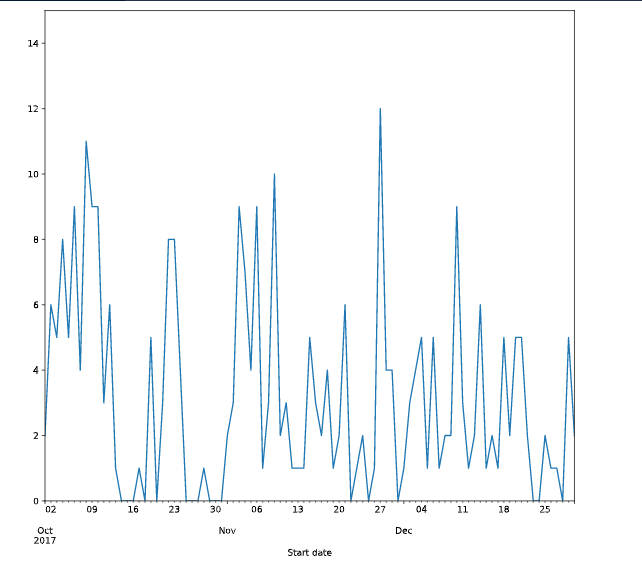

In [ ]:
# Import matplotlib
import matplotlib.pyplot as plt

# Resample rides to monthly, take the size, plot the results
rides.resample('M', on = 'Start date')\
  .size()\
  .plot(ylim = [0, 150])

# Show the results
plt.show()

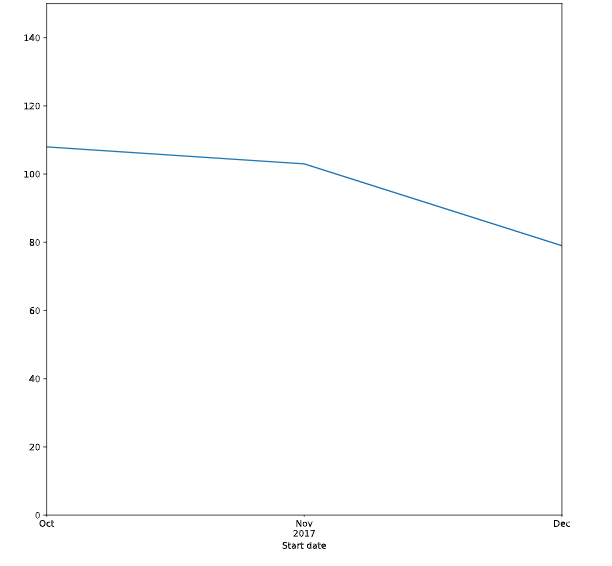

In [ ]:
# Resample rides to be monthly on the basis of Start date
monthly_rides = rides.resample('M', on = 'Start date')['Member type']

# Take the ratio of the .value_counts() over the total number of rides
print(monthly_rides.value_counts() / monthly_rides.size())

In [ ]:
Output:
    
Start date  Member         type
2017-10-31  Member         0.769
            Casual         0.231
2017-11-30  Member         0.825
            Casual         0.175
2017-12-31  Member         0.861
            Casual         0.139
Name: Member type, dtype: float64

In [ ]:
# Group rides by member type, and resample to the month
grouped = rides.groupby('Member type')\
  .resample('M', on = 'Start date')

# Print the median duration for each group
print(grouped['Duration'].median())

In [ ]:
Output:

Member type  Start date
Casual       2017-10-31    1636.0
             2017-11-30    1159.5
             2017-12-31     850.0
Member       2017-10-31     671.0
             2017-11-30     655.0
             2017-12-31     387.5
Name: Duration, dtype: float64

In [ ]:
# Localize the Start date column to America/New_York
# to set a timezone, keeping the date and time the same
rides['Start date'] = rides['Start date'].dt.tz_localize('America/New_York', ambiguous = 'NaT')

# Print first value
print(rides['Start date'].iloc[0])

In [ ]:
Output:
    
2017-10-01 15:23:25-04:00

In [ ]:
# Convert the Start date column to Europe/London
# to change the date and time to match a new timezone
rides['Start date'] = rides['Start date'].dt.tz_convert('Europe/London')

# Print the new value
print(rides['Start date'].iloc[0])

In [ ]:
# Add a column for the weekday of the start of the ride
rides['Ride start weekday'] = rides['Start date'].dt.day_name()

# Print the median trip time per weekday
print(rides.groupby(['Ride start weekday'])['Duration'].median())

In [ ]:
# Shift the index of the end date up one; now subract it from the start date
rides['Time since'] = rides['Start date'] - (rides['End date'].shift(1))

# Move from a timedelta to a number of seconds, which is easier to work with
rides['Time since'] = rides['Time since'].dt.total_seconds()

# Resample to the month
# groups rows on the basis of a datetime column
monthly = rides.resample('M',on = 'Start date')

# Print the average hours between rides each month
print(monthly['Time since'].mean()/(60*60))

In [ ]:
Output:
    
    Start date
    2017-10-31    5.519
    2017-11-30    7.256
    2017-12-31    9.202
    Freq: M, Name: Time since, dtype: float64